# YOLOv7 Training

To train YOLOv7 based on our custom dataset of snakes for instance segmentation

# Dependencies Installations

In [1]:
#Mount google drive to save weights to drive and to access test images in drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Needed for yolov7 to work
! pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-tc9gt42a
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-tc9gt42a
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 151 kB 70.2 MB/s 
     |████████████████████████████████| 1.4 MB 40.3 MB/s 
     |████████████████████████████████| 548 kB 63.8 MB/s 
     |████████████████████████████████| 248 kB 64.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 7.0 MB/s 
     |████████████████████████████████| 843 kB 66.7 MB/s 
     |████████████████████████████████| 117 kB 74.2 MB/s 
     |████████

YOLOv7-instance segmentation depends on detectron2 so let's install it.

In [3]:
#for experiment tracking
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 33.0 MB/s 
     |████████████████████████████████| 182 kB 73.3 MB/s 
     |████████████████████████████████| 168 kB 57.7 MB/s 
     |████████████████████████████████| 63 kB 183 kB/s 
     |████████████████████████████████| 166 kB 73.2 MB/s 
     |████████████████████████████████| 166 kB 47.0 MB/s 
     |████████████████████████████████| 162 kB 77.4 MB/s 
     |████████████████████████████████| 162 kB 73.5 MB/s 
     |████████████████████████████████| 158 kB 58.8 MB/s 
     |████████████████████████████████| 157 kB 74.5 MB/s 
     |████████████████████████████████| 157 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 74.3 MB/s 
     |████████████████████████████████| 157 kB 51.7 MB/s 
     |████████████████████████████████| 157 kB 78.5 MB/s 
     |████████████████████████████████| 157 kB 54.6 MB/s 
     |███████████████████████████

In [4]:
#for api access to support active learning
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 470 kB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 
     |████████████████████████████████| 145 kB 57.8 MB/s 
     |████████████████████████████████| 138 kB 59.3 MB/s 
     |████████████████████████████████| 178 kB 47.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=df82fca8e5fbe80297e0b02ca7453b1ec8397e98e9f269268bf61b50b7a61a62
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

In [5]:
# download snake dataset with annotations from roboflow
!curl -L "https://app.roboflow.com/ds/cDHezAvLlL?key=s3R03S8Ek0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    462      0  0:00:01  0:00:01 --:--:--   462
100  100M  100  100M    0     0  11.2M      0  0:00:08  0:00:08 --:--:-- 20.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/002fbf09f6744e009395ad1ed62ac57b_jpg.rf.1a8f1fdfcf5481705ebd5535ab61df22.jpg  
 extracting: test/images/00302623975e4672a606124ce4df1cab_jpg.rf.e03ea2fb2e36c6b3c6e978a5f7d75187.jpg  
 extracting: test/images/0040dedc8d4a4a49ab1828214e90f751_jpg.rf.b86a8c633aaa1d00e2cfe77e84d0273b.jpg  
 extracting: test/images/00607760bc85487ead7fa8e2258fa929_jpg.rf.d4d860593a3f0247c160693ff7127eb2.jpg  
 extracting: test/images/0066513689a14ebab1f17eea8e54df69_jpg.rf.8dde4724470003aa9ab0e

In [7]:
#download yolov7 github
!git clone -b u7 https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Total 998 (delta 0), reused 0 (delta 0), pack-reused 998
Receiving objects: 100% (998/998), 69.77 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (465/465), done.


In [8]:
# download pretrained weight
# !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-seg.pt

In [9]:
import pandas as pd
import os
import yaml

In [10]:
from roboflow import Roboflow

rf = Roboflow(api_key="ENZ4UFQ5TkrSOtWuLtkb")
project = rf.workspace().project("snakes-oozrc")

loading Roboflow workspace...
loading Roboflow project...


In [11]:
%env WANDB_API_KEY = a431816d64b8d5dbe407c39cfc8fdcef704bda14

env: WANDB_API_KEY=a431816d64b8d5dbe407c39cfc8fdcef704bda14


In [12]:
!wandb login

wandb: Currently logged in as: erjieyong. Use `wandb login --relogin` to force relogin


# Training

In [13]:
%%writefile /content/data.yaml

#to replace the data.yaml with correct path
train: /content/train/images
val: /content/valid/images
test: /content/test/images

nc: 1
names: ['snakes']

Overwriting /content/data.yaml


In [14]:
%%writefile ./hyp.scratch-high.yaml

# hyperparameters for our tuning
lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.3  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 0.7  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.9  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.1  # image mixup (probability)
copy_paste: 0.1  # segment copy-paste (probability)


Writing ./hyp.scratch-high.yaml


In [15]:
%%writefile ./yolov7-seg.yaml

# YOLOv7
# Change number of classes
# Parameters
nc: 1  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# YOLOv7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
  
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],  # 24
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 29-P4/16  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 37
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [512, 1, 1]],
   [-3, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 42-P5/32  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 50
  ]

# yolov7 head
head:
  [[-1, 1, SPPCSPC, [512]], # 51
  
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [37, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 63
   
   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [24, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]], # 75
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3, 63], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 88
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3, 51], 1, Concat, [1]],
   
   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]], # 101
   
   [75, 1, Conv, [256, 3, 1]],
   [88, 1, Conv, [512, 3, 1]],
   [101, 1, Conv, [1024, 3, 1]],

   [[102, 103, 104], 1, ISegment, [nc, anchors, 32, 256]],  # Detect(P3, P4, P5)
  ]


Writing ./yolov7-seg.yaml


In [16]:
#Training on our custom dataset
!python /content/yolov7/seg/segment/train.py --data /content/data.yaml --batch 16 --weights /content/drive/MyDrive/my_yolov7/best.pt --cfg /content/yolov7-seg.yaml --epochs 200 --name yolov7_seg_img --img 640 --hyp /content/hyp.scratch-high.yaml --project snake_img

wandb: Currently logged in as: erjieyong. Use `wandb login --relogin` to force relogin
segment/train: weights=/content/drive/MyDrive/my_yolov7/best.pt, cfg=/content/yolov7-seg.yaml, data=/content/data.yaml, hyp=/content/hyp.scratch-high.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=snake_img, name=yolov7_seg_img, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
YOLOv5 🚀 2022-11-14 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0

In [17]:
# copy training output to our drive
!cp -r snake_img/yolov7_seg_img /content/drive/MyDrive/my_yolov7/

# Testing

In [19]:
%%writefile /content/yolov7/seg/segment/predict.py
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license.

## JY CHANGES
# change mcolors = [(255,255,255) for cls in det[:, 5]] so that it will all become white
# change save_dir
# change save_path suffix from .mp4 to .webm
# change vid_write[i] encoding method from .mp4v to vp90

"""
Run YOLOv5 segmentation inference on images, videos, directories, streams, etc.

Usage - sources:
    $ python segment/predict.py --weights yolov5s-seg.pt --source 0                               # webcam
                                                                  img.jpg                         # image
                                                                  vid.mp4                         # video
                                                                  path/                           # directory
                                                                  'path/*.jpg'                    # glob
                                                                  'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                                  'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream

Usage - formats:
    $ python segment/predict.py --weights yolov5s-seg.pt                 # PyTorch
                                          yolov5s-seg.torchscript        # TorchScript
                                          yolov5s-seg.onnx               # ONNX Runtime or OpenCV DNN with --dnn
                                          yolov5s-seg.xml                # OpenVINO
                                          yolov5s-seg.engine             # TensorRT
                                          yolov5s-seg.mlmodel            # CoreML (macOS-only)
                                          yolov5s-seg_saved_model        # TensorFlow SavedModel
                                          yolov5s-seg.pb                 # TensorFlow GraphDef
                                          yolov5s-seg.tflite             # TensorFlow Lite
                                          yolov5s-seg_edgetpu.tflite     # TensorFlow Edge TPU
"""


import argparse
import os
import platform
import sys
from pathlib import Path

import torch
import torch.backends.cudnn as cudnn

FILE = Path(__file__).resolve()
ROOT = FILE.parents[1]  # YOLOv5 root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, Profile, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.segment.general import process_mask, scale_masks
from utils.segment.plots import plot_masks
from utils.torch_utils import select_device, smart_inference_mode


@smart_inference_mode()
def run(
        weights=ROOT / 'yolov5s-seg.pt',  # model.pt path(s)
        source=ROOT / 'data/images',  # file/dir/URL/glob, 0 for webcam
        data=ROOT / 'data/coco128.yaml',  # dataset.yaml path
        imgsz=(640, 640),  # inference size (height, width)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=False,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project=ROOT / 'runs/predict-seg',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    # save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    save_dir = Path(project) / name  # no increment run. only replace past photo
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
        bs = len(dataset)  # batch_size
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
        bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model.warmup(imgsz=(1 if pt else bs, 3, *imgsz))  # warmup
    seen, windows, dt = 0, [], (Profile(), Profile(), Profile())
    for path, im, im0s, vid_cap, s in dataset:
        with dt[0]:
            im = torch.from_numpy(im).to(device)
            im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
            im /= 255  # 0 - 255 to 0.0 - 1.0
            if len(im.shape) == 3:
                im = im[None]  # expand for batch dim

        # Inference
        with dt[1]:
            visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
            pred, out = model(im, augment=augment, visualize=visualize)
            proto = out[1]

        # NMS
        with dt[2]:
            pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det, nm=32)

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            if len(det):
                masks = process_mask(proto[i], det[:, 6:], det[:, :4], im.shape[2:], upsample=True)  # HWC

                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, 5].unique():
                    n = (det[:, 5] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

                # Mask plotting ----------------------------------------------------------------------------------------
                # mcolors = [colors(int(cls), True) for cls in det[:, 5]]
                mcolors = [(255,255,255) for cls in det[:, 5]]
                im_masks = plot_masks(im[i], masks, mcolors)  # image with masks shape(imh,imw,3)
                annotator.im = scale_masks(im.shape[2:], im_masks, im0.shape)  # scale to original h, w
                # Mask plotting ----------------------------------------------------------------------------------------

                # Write results
                for *xyxy, conf, cls in reversed(det[:, :6]):
                    if save_txt:  # Write to file
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(f'{txt_path}.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                    if save_crop:
                        save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)

            # Stream results
            im0 = annotator.result()
            if view_img:
                if platform.system() == 'Linux' and p not in windows:
                    windows.append(p)
                    cv2.namedWindow(str(p), cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)  # allow window resize (Linux)
                    cv2.resizeWindow(str(p), im0.shape[1], im0.shape[0])
                cv2.imshow(str(p), im0)
                cv2.waitKey(1)  # 1 millisecond

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        # save_path = str(Path(save_path).with_suffix('.mp4'))  # force *.mp4 suffix on results videos
                        save_path = str(Path(save_path).with_suffix('.webm'))  # force *.mkv suffix on results videos
                        # vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'vp90'), fps, (w, h))
                    vid_writer[i].write(im0)

        # Print time (inference-only)
        LOGGER.info(f"{s}{'' if len(det) else '(no detections), '}{dt[1].dt * 1E3:.1f}ms")

    # Print results
    t = tuple(x.t / seen * 1E3 for x in dt)  # speeds per image
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights[0])  # update model (to fix SourceChangeWarning)


def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s-seg.pt', help='model path(s)')
    parser.add_argument('--source', type=str, default=ROOT / 'data/images', help='file/dir/URL/glob, 0 for webcam')
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--view-img', action='store_true', help='show results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    parser.add_argument('--update', action='store_true', help='update all models')
    parser.add_argument('--project', default=ROOT / 'runs/predict-seg', help='save results to project/name')
    parser.add_argument('--name', default='exp', help='save results to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    opt = parser.parse_args()
    opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # expand
    print_args(vars(opt))
    return opt


def main(opt):
    check_requirements(exclude=('tensorboard', 'thop'))
    run(**vars(opt))


if __name__ == "__main__":
    opt = parse_opt()
    main(opt)



Overwriting /content/yolov7/seg/segment/predict.py


In [20]:
%%writefile /content/yolov7/seg/utils/segment/plots.py
# update alpha to 1 so that it is opague

import contextlib
import math
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from .. import threaded
from ..general import xywh2xyxy
from ..plots import Annotator, colors


def plot_masks(img, masks, colors, alpha=1):
    """
    Args:
        img (tensor): img is in cuda, shape: [3, h, w], range: [0, 1]
        masks (tensor): predicted masks on cuda, shape: [n, h, w]
        colors (List[List[Int]]): colors for predicted masks, [[r, g, b] * n]
    Return:
        ndarray: img after draw masks, shape: [h, w, 3]

    transform colors and send img_gpu to cpu for the most time.
    """
    img_gpu = img.clone()
    num_masks = len(masks)
    if num_masks == 0:
        return img.permute(1, 2, 0).contiguous().cpu().numpy() * 255

    # [n, 1, 1, 3]
    # faster this way to transform colors
    colors = torch.tensor(colors, device=img.device).float() / 255.0
    colors = colors[:, None, None, :]
    # [n, h, w, 1]
    masks = masks[:, :, :, None]
    masks_color = masks.repeat(1, 1, 1, 3) * colors * alpha
    inv_alph_masks = masks * (-alpha) + 1
    masks_color_summand = masks_color[0]
    if num_masks > 1:
        inv_alph_cumul = inv_alph_masks[:(num_masks - 1)].cumprod(dim=0)
        masks_color_cumul = masks_color[1:] * inv_alph_cumul
        masks_color_summand += masks_color_cumul.sum(dim=0)

    # print(inv_alph_masks.prod(dim=0).shape) # [h, w, 1]
    img_gpu = img_gpu.flip(dims=[0])  # filp channel for opencv
    img_gpu = img_gpu.permute(1, 2, 0).contiguous()
    # [h, w, 3]
    img_gpu = img_gpu * inv_alph_masks.prod(dim=0) + masks_color_summand
    return (img_gpu * 255).byte().cpu().numpy()


@threaded
def plot_images_and_masks(images, targets, masks, paths=None, fname='images.jpg', names=None):
    # Plot image grid with labels
    if isinstance(images, torch.Tensor):
        images = images.cpu().float().numpy()
    if isinstance(targets, torch.Tensor):
        targets = targets.cpu().numpy()
    if isinstance(masks, torch.Tensor):
        masks = masks.cpu().numpy().astype(int)

    max_size = 1920  # max image size
    max_subplots = 16  # max image subplots, i.e. 4x4
    bs, _, h, w = images.shape  # batch size, _, height, width
    bs = min(bs, max_subplots)  # limit plot images
    ns = np.ceil(bs ** 0.5)  # number of subplots (square)
    if np.max(images[0]) <= 1:
        images *= 255  # de-normalise (optional)

    # Build Image
    mosaic = np.full((int(ns * h), int(ns * w), 3), 255, dtype=np.uint8)  # init
    for i, im in enumerate(images):
        if i == max_subplots:  # if last batch has fewer images than we expect
            break
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        im = im.transpose(1, 2, 0)
        mosaic[y:y + h, x:x + w, :] = im

    # Resize (optional)
    scale = max_size / ns / max(h, w)
    if scale < 1:
        h = math.ceil(scale * h)
        w = math.ceil(scale * w)
        mosaic = cv2.resize(mosaic, tuple(int(x * ns) for x in (w, h)))

    # Annotate
    fs = int((h + w) * ns * 0.01)  # font size
    annotator = Annotator(mosaic, line_width=round(fs / 10), font_size=fs, pil=True, example=names)
    for i in range(i + 1):
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        annotator.rectangle([x, y, x + w, y + h], None, (255, 255, 255), width=2)  # borders
        if paths:
            annotator.text((x + 5, y + 5 + h), text=Path(paths[i]).name[:40], txt_color=(220, 220, 220))  # filenames
        if len(targets) > 0:
            idx = targets[:, 0] == i
            ti = targets[idx]  # image targets

            boxes = xywh2xyxy(ti[:, 2:6]).T
            classes = ti[:, 1].astype('int')
            labels = ti.shape[1] == 6  # labels if no conf column
            conf = None if labels else ti[:, 6]  # check for confidence presence (label vs pred)

            if boxes.shape[1]:
                if boxes.max() <= 1.01:  # if normalized with tolerance 0.01
                    boxes[[0, 2]] *= w  # scale to pixels
                    boxes[[1, 3]] *= h
                elif scale < 1:  # absolute coords need scale if image scales
                    boxes *= scale
            boxes[[0, 2]] += x
            boxes[[1, 3]] += y
            for j, box in enumerate(boxes.T.tolist()):
                cls = classes[j]
                color = colors(cls)
                cls = names[cls] if names else cls
                if labels or conf[j] > 0.25:  # 0.25 conf thresh
                    label = f'{cls}' if labels else f'{cls} {conf[j]:.1f}'
                    annotator.box_label(box, label, color=color)

            # Plot masks
            if len(masks):
                if masks.max() > 1.0:  # mean that masks are overlap
                    image_masks = masks[[i]]  # (1, 640, 640)
                    nl = len(ti)
                    index = np.arange(nl).reshape(nl, 1, 1) + 1
                    image_masks = np.repeat(image_masks, nl, axis=0)
                    image_masks = np.where(image_masks == index, 1.0, 0.0)
                else:
                    image_masks = masks[idx]

                im = np.asarray(annotator.im).copy()
                for j, box in enumerate(boxes.T.tolist()):
                    if labels or conf[j] > 0.25:  # 0.25 conf thresh
                        color = colors(classes[j])
                        mh, mw = image_masks[j].shape
                        if mh != h or mw != w:
                            mask = image_masks[j].astype(np.uint8)
                            mask = cv2.resize(mask, (w, h))
                            mask = mask.astype(np.bool)
                        else:
                            mask = image_masks[j].astype(np.bool)
                        with contextlib.suppress(Exception):
                            im[y:y + h, x:x + w, :][mask] = im[y:y + h, x:x + w, :][mask] * 0.4 + np.array(color) * 0.6
                annotator.fromarray(im)
    annotator.im.save(fname)  # save


def plot_results_with_masks(file="path/to/results.csv", dir="", best=True):
    # Plot training results.csv. Usage: from utils.plots import *; plot_results('path/to/results.csv')
    save_dir = Path(file).parent if file else Path(dir)
    fig, ax = plt.subplots(2, 8, figsize=(18, 6), tight_layout=True)
    ax = ax.ravel()
    files = list(save_dir.glob("results*.csv"))
    assert len(files), f"No results.csv files found in {save_dir.resolve()}, nothing to plot."
    for f in files:
        try:
            data = pd.read_csv(f)
            index = np.argmax(
                0.9 * data.values[:, 8] + 0.1 * data.values[:, 7] + 0.9 * data.values[:, 12] +
                0.1 * data.values[:, 11],)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate([1, 2, 3, 4, 5, 6, 9, 10, 13, 14, 15, 16, 7, 8, 11, 12]):
                y = data.values[:, j]
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker=".", label=f.stem, linewidth=2, markersize=2)
                if best:
                    # best
                    ax[i].scatter(index, y[index], color="r", label=f"best:{index}", marker="*", linewidth=3)
                    ax[i].set_title(s[j] + f"\n{round(y[index], 5)}")
                else:
                    # last
                    ax[i].scatter(x[-1], y[-1], color="r", label="last", marker="*", linewidth=3)
                    ax[i].set_title(s[j] + f"\n{round(y[-1], 5)}")
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            print(f"Warning: Plotting error for {f}: {e}")
    ax[1].legend()
    fig.savefig(save_dir / "results.png", dpi=200)
    plt.close()


Overwriting /content/yolov7/seg/utils/segment/plots.py


In [22]:
# check inference on first thousand images
! python /content/yolov7/seg/segment/predict.py --weights /content/drive/MyDrive/my_yolov7/yolov7_seg_img/weights/best.pt --source /content/drive/MyDrive/my_yolov7/first_thousand   --save-txt --save-conf

segment/predict: weights=['/content/drive/MyDrive/my_yolov7/yolov7_seg_img/weights/best.pt'], source=/content/drive/MyDrive/my_yolov7/first_thousand, data=yolov7/seg/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov7/seg/runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
requirements: ipython not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov7/seg/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-11-14 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
yolov7-s

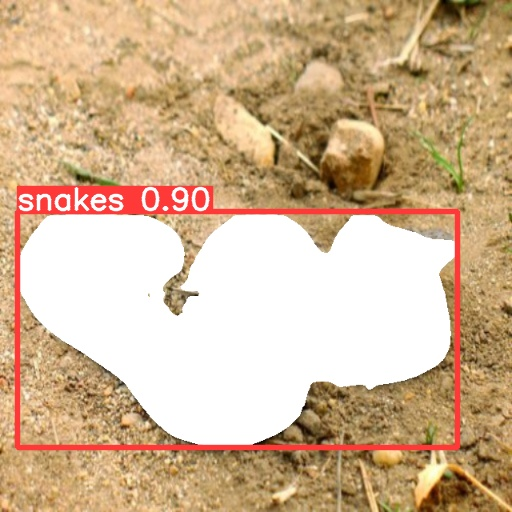

In [25]:
from IPython.display import Image
Image('yolov7/seg/runs/predict-seg/exp/1dd55e7f7b534b3182de2efed1b426cb.jpg')

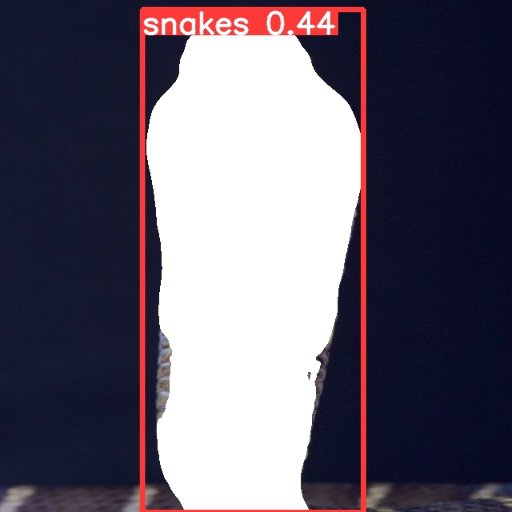

In [26]:
Image('yolov7/seg/runs/predict-seg/exp/1dd39df34d5b430c9fcc371982286bb0.jpg')

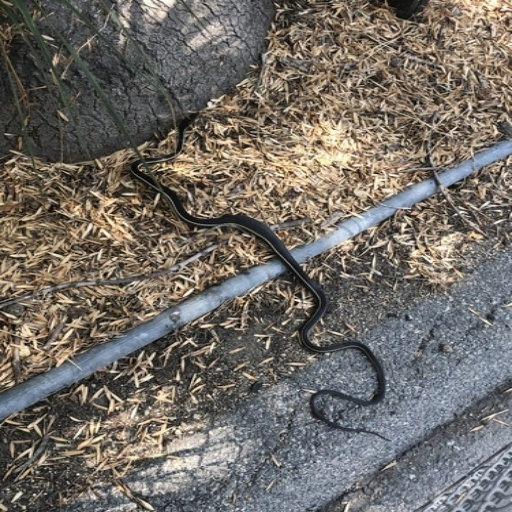

In [29]:
Image('yolov7/seg/runs/predict-seg/exp/1dcfd512922348c49f966eaee23e9ba9.jpg')

In [28]:
#Active learning
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future 
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.6 
predicted_image_dir = "/content/yolov7/seg/runs/predict-seg/exp/labels"
image_dir = "/content/drive/MyDrive/my_yolov7/first_thousand"

for i,txt_file in enumerate(os.listdir(predicted_image_dir)):
    print(i, txt_file)
    with open(os.path.join(predicted_image_dir,txt_file), 'r') as fid:
        for line in fid:
            label, x1, y1, x2, y2, conf = line.split(" ")
            conf = float(conf)
            if conf < MIN_CONF_THRESHOLD:
                image_name = txt_file[:-4]
                print(f"Image has a low confidence prediction, uploading to project: {image_name}.jpg")
                #Upload via Roboflow pip package
                project.upload(os.path.join(image_dir,f'{image_name}.jpg'))
            break

0 0cf4ec02ca784f3e9f88d93d63dfc2ee.txt
Image has a low confidence prediction, uploading to project: 0cf4ec02ca784f3e9f88d93d63dfc2ee.jpg
1 0b5e68e958cb4a29bbc5cfe76740963b.txt
Image has a low confidence prediction, uploading to project: 0b5e68e958cb4a29bbc5cfe76740963b.jpg
2 0d6d24f594434b6dabf8991c00338c9a.txt
3 1c1ecb7c19794504bc8fdbd99f1e4471.txt
4 0f8d836be66945e3a80dfeaaf3fb1e39.txt
5 0afd4bae8b0344fcae79d2e1d2944838.txt
6 0e89e1bcfef749dd812618130355f444.txt
Image has a low confidence prediction, uploading to project: 0e89e1bcfef749dd812618130355f444.jpg
7 00cccbc7f48f4bbeb12475dacd45234c.txt
8 0faa9b02a1f04bc2907811807a6e7eaa.txt
9 00ba56763fd1422caef754cd46aa9ebc.txt
Image has a low confidence prediction, uploading to project: 00ba56763fd1422caef754cd46aa9ebc.jpg
10 1aee72b02915440abc51302d09329a09.txt
11 0e6df4591e7147b883e48d7aa0876fbd.txt
12 0c0a93ada9cb4e37a16c1c671bf23bab.txt
13 0bceb593a06f4ccebc4c4d59be324dcf.txt
Image has a low confidence prediction, uploading to projec

KeyboardInterrupt: ignored

In [30]:
# check inference on snake video
! python /content/yolov7/seg/segment/predict.py --weights /content/drive/MyDrive/my_yolov7/yolov7_seg_img/weights/best.pt --source /content/drive/MyDrive/my_yolov7/snake360.mp4   --save-txt --save-conf

Streaming output truncated to the last 5000 lines.
video 1/1 (11428/16424) /content/drive/.shortcut-targets-by-id/1CLTCFGcsPQmY3V_KaxLZf-N3bhhSbTdG/my_yolov7/snake360.mp4: 384x640 2 snakess, 23.3ms
video 1/1 (11429/16424) /content/drive/.shortcut-targets-by-id/1CLTCFGcsPQmY3V_KaxLZf-N3bhhSbTdG/my_yolov7/snake360.mp4: 384x640 1 snakes, 22.1ms
video 1/1 (11430/16424) /content/drive/.shortcut-targets-by-id/1CLTCFGcsPQmY3V_KaxLZf-N3bhhSbTdG/my_yolov7/snake360.mp4: 384x640 1 snakes, 23.7ms
video 1/1 (11431/16424) /content/drive/.shortcut-targets-by-id/1CLTCFGcsPQmY3V_KaxLZf-N3bhhSbTdG/my_yolov7/snake360.mp4: 384x640 1 snakes, 22.4ms
video 1/1 (11432/16424) /content/drive/.shortcut-targets-by-id/1CLTCFGcsPQmY3V_KaxLZf-N3bhhSbTdG/my_yolov7/snake360.mp4: 384x640 1 snakes, 23.1ms
video 1/1 (11433/16424) /content/drive/.shortcut-targets-by-id/1CLTCFGcsPQmY3V_KaxLZf-N3bhhSbTdG/my_yolov7/snake360.mp4: 384x640 1 snakes, 22.5ms
video 1/1 (11434/16424) /content/drive/.shortcut-targets-by-id/1CLTCFGcs

In [31]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/yolov7/seg/runs/predict-seg/exp/snake360.mp4"

# Compressed video path
compressed_path = "/content/drive/MyDrive/my_yolov7/snake360_compress.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)